# Analyzing Retail Sales

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')
%matplotlib inline  
os.chdir('/media/steven/WD_4TB/Dropbox/DSC/680/retail_forecasting/')
#os.chdir('E:\\Dropbox\\DSC\\680\\retail_forecasting')

Loading our data

In [2]:
features = pd.read_csv('Features data set.csv', index_col=[0,1])
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv', index_col=0)

Exploring the structure of the data

In [3]:
features.head()

Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Store Date                                                                   
1     05/02/2010        42.31       2.572        NaN        NaN        NaN   
      12/02/2010        38.51       2.548        NaN        NaN        NaN   
      19/02/2010        39.93       2.514        NaN        NaN        NaN   
      26/02/2010        46.63       2.561        NaN        NaN        NaN   
      05/03/2010        46.50       2.625        NaN        NaN        NaN   

                  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
Store Date                                                                   
1     05/02/2010        NaN        NaN  211.096358         8.106      False  
      12/02/2010        NaN        NaN  211.242170         8.106       True  
      19/02/2010        NaN        NaN  211.289143         8.106      False  
      26/02/2010        NaN        NaN  211.319643         8.106      False  
      05/03/2010        NaN        NaN  211.350143         8.106      False

In [4]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [5]:
stores.head()

,Type,Size
Store,,
1,A,151315
2,A,202307
3,B,37392
4,A,205863
5,B,34875


Merging together our sales data, and the features dataset. The features dataset contains most of the variables being considered as predictive features, and the sales dataset contains the actual sales value I'm attempting to predict. Merging everything together here will make it easier to explore the relationships between these values.

In [6]:
sales_and_features = sales.join(features, lsuffix='_sales', rsuffix='_feature', on=['Store', 'Date'])
sales_and_features

,Store,Dept,Date,Weekly_Sales,IsHoliday_sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_feature
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,1,12/03/2010,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,1,19/03/2010,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,1,26/03/2010,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,1,02/04/2010,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,1,09/04/2010,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


Histogram of our weekly sales. This graph is heavily skewed, performing a log transformation may help.

(array([1.97084e+05, 1.08466e+05, 4.61850e+04, 2.56030e+04, 1.56620e+04,
        1.01240e+04, 6.55400e+03, 4.23800e+03, 2.47200e+03, 1.59800e+03,
        1.03100e+03, 6.77000e+02, 5.51000e+02, 4.90000e+02, 3.15000e+02,
        2.03000e+02, 1.13000e+02, 5.50000e+01, 4.10000e+01, 2.30000e+01,
        1.20000e+01, 1.10000e+01, 9.00000e+00, 9.00000e+00, 2.00000e+00,
        7.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00, 4.00000e+00,
        6.00000e+00, 3.00000e+00, 3.00000e+00, 2.00000e+00, 2.00000e+00,
        2.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ -4988.94 ,   6645.865,  18280.67 ,  29915.475,  41550.28 ,
         53185.085,  64819.89 ,  76454.695,  88089.5  

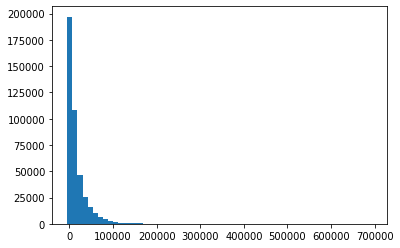

In [7]:
plt.hist(sales_and_features.Weekly_Sales, bins=60)

Upon initially attempting to do a log transformation, I encountered an issue where the sales data contained several zero values. Since at the moment, I'm just trying to see if a transformation will help normalize, I'll continue by plotting the values that weren't zero after a log10 transformation.

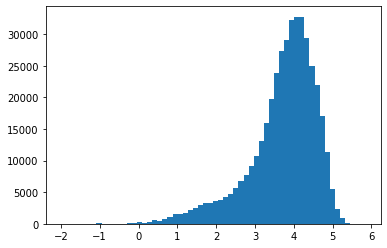

In [8]:
log_sales = np.log10(sales_and_features[sales_and_features.Weekly_Sales!=0].Weekly_Sales)
plt.hist(log_sales, bins=60)
sales_and_features['log_sales'] = log_sales

Now, I want to take a look at the weeks that contained a zero for the sales value. A few look like they are probably just missing actual sales numbers or maybe there was a closure of some sort. Others seem to be missing a large amount of data. Moving forward, I'm comfortable dropping these values.

In [9]:
sales_and_features[sales_and_features.Weekly_Sales<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday_sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_feature,log_sales
846,1,6,10/08/2012,-139.65,False,85.05,3.494,11436.22,245.00,6.85,6964.26,4836.22,221.958433,6.908,False,NaN
2384,1,18,04/05/2012,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,False,NaN
6048,1,47,19/02/2010,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,NaN
6049,1,47,12/03/2010,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,NaN
6051,1,47,08/10/2010,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False,NaN
6055,1,47,11/03/2011,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,False,NaN
6056,1,47,08/04/2011,-298.00,False,67.84,3.622,NaN,NaN,NaN,NaN,NaN,215.074394,7.682,False,NaN
6057,1,47,08/07/2011,-198.00,False,85.83,3.480,NaN,NaN,NaN,NaN,NaN,215.277175,7.962,False,NaN
6059,1,47,12/08/2011,0.00,False,90.76,3.638,NaN,NaN,NaN,NaN,NaN,215.605788,7.962,False,NaN
6060,1,47,19/08/2011,0.00,False,89.94,3.554,NaN,NaN,NaN,NaN,NaN,215.669311,7.962,False,NaN


In [10]:
sales_and_features = sales_and_features[sales_and_features['Weekly_Sales'] > 0]

One of my initial concerns at the start of this project was that three of our features with the most predictive power were economic indicators. My concern was that these values would be too closely correlated to be used individually in a final model. Looking at the correlation matrix now, that concern appears unfounded. 

In [11]:
econ_indicators = features[['Fuel_Price','CPI','Unemployment']].dropna()
econ_indicators
econ_indicators.corr()

,Fuel_Price,CPI,Unemployment
Fuel_Price,1.000000,-0.186696,-0.03336
CPI,-0.186696,1.000000,-0.30311
Unemployment,-0.033360,-0.303110,1.00000


## Null Values
The features dataset contains numerous null values. Some are intentional, where markdown columns are null, for example, indicating no promotion going on. Others seem to be missing at random, such as fuel price, CPI or Unemployment data missing. To fill these in, I'll be using the mean value of these features for the same week.

In [12]:
sales_and_features.MarkDown1.fillna(0, inplace=True)
sales_and_features.MarkDown2.fillna(0, inplace=True)
sales_and_features.MarkDown3.fillna(0, inplace=True)
sales_and_features.MarkDown4.fillna(0, inplace=True)
sales_and_features.MarkDown5.fillna(0, inplace=True)

# Significance of Correlations

In [13]:
sales_and_features.corr()

,Store,Dept,Weekly_Sales,IsHoliday_sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_feature,log_sales
Store,1.000000,0.024258,-0.085117,-0.000522,-0.050230,0.065321,-0.059970,-0.033727,-0.020301,-0.042808,-0.012605,-0.211261,0.208759,-0.000522,-0.134671
Dept,0.024258,1.000000,0.148749,0.000663,0.004727,0.003544,0.001454,0.000435,0.001517,0.001881,0.002766,-0.007178,0.007787,0.000663,0.021397
Weekly_Sales,-0.085117,0.148749,1.000000,0.012843,-0.002339,0.000089,0.047249,0.020948,0.038522,0.037470,0.050598,-0.021162,-0.025806,0.012843,0.643636
IsHoliday_sales,-0.000522,0.000663,0.012843,1.000000,-0.155775,-0.078155,-0.003517,0.207326,0.266731,0.011625,-0.015186,-0.001933,0.010555,1.000000,0.005689
Temperature,-0.050230,0.004727,-0.002339,-0.155775,1.000000,0.143700,-0.026428,-0.179684,-0.056016,-0.050323,-0.014847,0.182223,0.096768,-0.155775,-0.041517
Fuel_Price,0.065321,0.003544,0.000089,-0.078155,0.143700,1.000000,0.297075,0.029282,0.018646,0.166645,0.215588,-0.164199,-0.033915,-0.078155,-0.006030
MarkDown1,-0.059970,0.001454,0.047249,-0.003517,-0.026428,0.297075,1.000000,0.175005,-0.014425,0.838866,0.415271,0.010915,-0.105257,-0.003517,0.063679
MarkDown2,-0.033727,0.000435,0.020948,0.207326,-0.179684,0.029282,0.175005,1.000000,-0.006090,0.113446,0.131847,-0.003694,-0.041497,0.207326,0.029602
MarkDown3,-0.020301,0.001517,0.038522,0.266731,-0.056016,0.018646,-0.014425,-0.006090,1.000000,-0.012031,0.042542,-0.005959,-0.018078,0.266731,0.025444
MarkDown4,-0.042808,0.001881,0.037470,0.011625,-0.050323,0.166645,0.838866,0.113446,-0.012031,1.000000,0.303536,-0.002061,-0.076583,0.011625,0.046563


Using a permutation test to analyze the p-value of each feature in comparison to Weekly Sales.

In [14]:
from mlxtend.evaluate import permutation_test

X_to_test = ['CPI', 'Temperature', 'Fuel_Price', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday_sales']
for x in X_to_test:
    p_value = permutation_test(sales_and_features[x], sales_and_features.log_sales,
                               method='approximate',
                               num_rounds=1000,
                               seed=0)
    print(f'{x} --- Observed Pearson R:{np.corrcoef(sales_and_features[x], sales_and_features.log_sales)[1][0]:.2f}  p-value:{p_value:.4f}')

CPI --- Observed Pearson R:-0.02  p-value:0.0000
Temperature --- Observed Pearson R:-0.04  p-value:0.0000
Fuel_Price --- Observed Pearson R:-0.01  p-value:0.0000
Unemployment --- Observed Pearson R:-0.04  p-value:0.0000
MarkDown1 --- Observed Pearson R:0.06  p-value:0.0000
MarkDown2 --- Observed Pearson R:0.03  p-value:0.0000
MarkDown3 --- Observed Pearson R:0.03  p-value:0.0000
MarkDown4 --- Observed Pearson R:0.05  p-value:0.0000
MarkDown5 --- Observed Pearson R:0.06  p-value:0.0000
IsHoliday_sales --- Observed Pearson R:0.01  p-value:0.0000


While observed correlations between sales and input factors are all low, they were shown to be statistically significant through permutation testing.

# Model Building

In [9]:
import statsmodels.api as sm

In [16]:
y = sales_and_features.log_sales
X_cols = ['CPI', 'Temperature', 'Fuel_Price', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday_sales']
X = sales_and_features[X_cols]
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     423.4
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:48:55   Log-Likelihood:            -5.4512e+05
No. Observations:              420212   AIC:                         1.090e+06
Df Residuals:                  420201   BIC:                         1.090e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.2619      0.016    267.454      0.000       4.231       4.293
CPI                -0.0008   3.87e-05    -20.229      0.000      -0.001      -0.001
Temperature        -0.0011   7.99e-05    -13.622      0.000      -0.001      -0.001
Fuel_Price         -0.0720      0.003    -21.721      0.000      -0.078      -0.065
Unemployment       -0.0196      0.001    -24.932      0.000      -0.021      -0.018
MarkDown1        1.153e-05   4.56e-07     25.304      0.000    1.06e-05    1.24e-05
MarkDown2        2.072e-06   2.85e-07      7.272      0.000    1.51e-06    2.63e-06
MarkDown3        4.123e-06   2.58e-07     16.007      0.000    3.62e-06    4.63e-06
MarkDown4       -6.508e-06   6.57e-07     -9.911      0.000   -7.79e-06   -5.22e-06
MarkDown5        7.068e-06   3.64e-07     19.441      0.000    6.36e-06    7.78e-06
IsHoliday_sales    -0.0297      0.006     -5.172      0.000      -0.041      -0.018
==============================================================================
Omnibus:                    93209.906   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202157.804
Skew:                          -1.289   Prob(JB):                         0.00
Kurtosis:                       5.214   Cond. No.                     9.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well, that's pretty terrible. My model explains almost none of the variance found in weekly sales. I've entirely ignored store information up to this point. Perhaps adding these features will be useful.

## Store Features Included

In [17]:
sales_features_and_stores = sales_and_features.join(stores, on='Store', rsuffix='_store')
sales_features_and_stores.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_feature,log_sales,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4.396626,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,4.663131,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,4.619047,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,4.287881,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,4.339012,A,151315


In [18]:
sales_features_and_stores = pd.concat([sales_features_and_stores, pd.get_dummies(sales_features_and_stores['Type'])], axis=1)
sales_features_and_stores.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_feature,log_sales,Type,Size,A,B,C
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,0.0,211.096358,8.106,False,4.396626,A,151315,1,0,0
1,1,1,12/02/2010,46039.49,True,38.51,2.548,0.0,0.0,0.0,...,0.0,211.242170,8.106,True,4.663131,A,151315,1,0,0
2,1,1,19/02/2010,41595.55,False,39.93,2.514,0.0,0.0,0.0,...,0.0,211.289143,8.106,False,4.619047,A,151315,1,0,0
3,1,1,26/02/2010,19403.54,False,46.63,2.561,0.0,0.0,0.0,...,0.0,211.319643,8.106,False,4.287881,A,151315,1,0,0
4,1,1,05/03/2010,21827.90,False,46.50,2.625,0.0,0.0,0.0,...,0.0,211.350143,8.106,False,4.339012,A,151315,1,0,0


In [19]:
X_to_test = ['Size','A','B','C']
for x in X_to_test:
    p_value = permutation_test(sales_features_and_stores[x], sales_features_and_stores.log_sales,
                               method='approximate',
                               num_rounds=1000,
                               seed=0)
    print(f'{x} --- Observed Pearson R:{np.corrcoef(sales_features_and_stores[x], sales_features_and_stores.log_sales)[1][0]:.2f}  p-value:{p_value:.4f}')

Size --- Observed Pearson R:0.32  p-value:0.0000
A --- Observed Pearson R:0.19  p-value:0.0000
B --- Observed Pearson R:-0.05  p-value:0.0000
C --- Observed Pearson R:-0.24  p-value:0.0000


Okay, we're seeing some stronger correlations here, especially with stores of type C and with the size of stores. Let's add these to the previous model and see where we get.

In [20]:
y = sales_features_and_stores.log_sales
X_cols = ['CPI', 'Temperature', 'Fuel_Price', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday_sales', 'Size','A','B','C']
X = sales_features_and_stores[X_cols]
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     4088.
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:50:12   Log-Likelihood:            -5.2220e+05
No. Observations:              420212   AIC:                         1.044e+06
Df Residuals:                  420198   BIC:                         1.045e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.4113      0.012    201.759      0.000       2.388       2.435
CPI                -0.0004   3.68e-05    -10.088      0.000      -0.000      -0.000
Temperature      6.965e-05   7.64e-05      0.912      0.362      -8e-05       0.000
Fuel_Price         -0.0345      0.003    -10.960      0.000      -0.041      -0.028
Unemployment       -0.0088      0.001    -11.626      0.000      -0.010      -0.007
MarkDown1        1.156e-06   4.34e-07      2.661      0.008    3.05e-07    2.01e-06
MarkDown2        5.611e-09    2.7e-07      0.021      0.983   -5.24e-07    5.35e-07
MarkDown3        1.968e-06   2.44e-07      8.061      0.000    1.49e-06    2.45e-06
MarkDown4       -1.407e-06   6.22e-07     -2.261      0.024   -2.63e-06   -1.87e-07
MarkDown5        1.533e-06   3.46e-07      4.432      0.000    8.55e-07    2.21e-06
IsHoliday_sales     0.0047      0.005      0.856      0.392      -0.006       0.015
Size             5.138e-06   3.72e-08    138.030      0.000    5.07e-06    5.21e-06
A                   0.7555      0.006    136.402      0.000       0.745       0.766
B                   0.9527      0.004    226.928      0.000       0.944       0.961
C                   0.7031      0.005    128.285      0.000       0.692       0.714
==============================================================================
Omnibus:                    92192.961   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           228960.037
Skew:                          -1.212   Prob(JB):                         0.00
Kurtosis:                       5.684   Cond. No.                     8.34e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Additional Models

In [21]:
from sklearn.linear_model import RidgeCV
y = sales_features_and_stores.log_sales
X_cols = ['CPI', 'Temperature', 'Fuel_Price', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday_sales', 'Size','A','B','C']
X = sales_features_and_stores[X_cols]
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
ridge.score(X,y)

-12.847460033995239

In [22]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
lasso = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
print(lasso.score(X,y))
y_pred = lasso.predict(X)
print(f'Mean Squared error of {mean_squared_error(y, y_pred)}')

0.11225668294136859
Mean Squared error of 0.7029808271769403


In [23]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


random_f = rfr(n_estimators=100)
random_f.fit(X, y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(random_f,X,y,cv=10,scoring='explained_variance')
print("Est. explained variance: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Est. explained variance: 0.01 (+/- 0.17)


In [25]:
estimators = [10, 20, 40, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []

# for each number of estimators, fit the model and find the results for 8-fold cross validation
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None, n_jobs=-1)
    scores_rfr = cross_val_score(model,X,y,cv=10,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print("")
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting

estimators: 10
Est. explained variance: 0.01 (+/- 0.18)

estimators: 20
Est. explained variance: 0.01 (+/- 0.18)

estimators: 40
Est. explained variance: 0.01 (+/- 0.17)

estimators: 80
Est. explained variance: 0.01 (+/- 0.18)



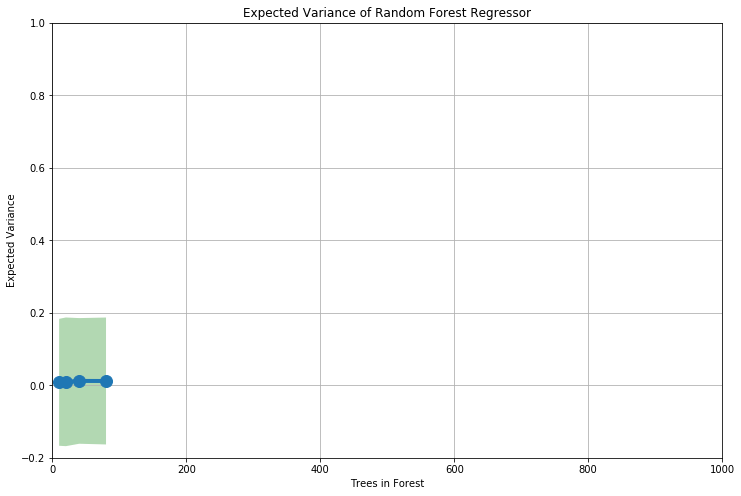

In [26]:
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfrs,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.2,1])
ax.set_xlim([0,1000])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()

## XGboost

In [13]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth':5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [28]:
cv_results.iloc[-1]

train-rmse-mean    0.830182
train-rmse-std     0.001515
test-rmse-mean     0.832114
test-rmse-std      0.003195
Name: 99, dtype: float64

A default set of parameters using XGboost resulted in a RMSE of 0.832230 on the log of weekly sales. This is worse than our Lasso regression's performance of 0.702981. Maybe we can do better with some parameter tuning.

In [29]:
min_rmse = float("Inf")
best_params = None

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,8)
    for min_child_weight in range(5,8)
]

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    cv_results = xgb.cv(
        params,
        data_dmatrix,
        num_boost_round=100,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(rmse, boost_rounds))
    if rmse < min_rmse:
        min_rmse = rmse
        best_params = (max_depth,min_child_weight)
        
print(best_params)

CV with max_depth=3, min_child_weight=5
	RMSE 0.8332747999999999 for 99 rounds
CV with max_depth=3, min_child_weight=6
	RMSE 0.8332747999999999 for 99 rounds
CV with max_depth=3, min_child_weight=7
	RMSE 0.8332747999999999 for 99 rounds
CV with max_depth=4, min_child_weight=5
	RMSE 0.8323267999999999 for 99 rounds
CV with max_depth=4, min_child_weight=6
	RMSE 0.8323267999999999 for 99 rounds
CV with max_depth=4, min_child_weight=7
	RMSE 0.8323267999999999 for 99 rounds
CV with max_depth=5, min_child_weight=5
	RMSE 0.8320550000000001 for 99 rounds
CV with max_depth=5, min_child_weight=6
	RMSE 0.8320550000000001 for 99 rounds
CV with max_depth=5, min_child_weight=7
	RMSE 0.8320550000000001 for 99 rounds
CV with max_depth=6, min_child_weight=5
	RMSE 0.832228 for 83 rounds
CV with max_depth=6, min_child_weight=6
	RMSE 0.832228 for 83 rounds
CV with max_depth=6, min_child_weight=7
	RMSE 0.832228 for 83 rounds
CV with max_depth=7, min_child_weight=5
	RMSE 0.8324158 for 72 rounds
CV with max_

In [30]:
params['max_depth'] = 5
params['min_child_weight'] = 5

In [31]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_rmse = float("Inf")
best_params = None

for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample_bytree={}".format(
                             subsample,
                             colsample))
    # Update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample

    cv_results = xgb.cv(
        params,
        data_dmatrix,
        num_boost_round=100,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(rmse, boost_rounds))
    if rmse < min_rmse:
        min_rmse = rmse
        best_params = (subsample,colsample)
        
print(best_params)

CV with subsample=0.7, colsample_bytree=0.7
	RMSE 0.8316974 for 70 rounds
CV with subsample=0.7, colsample_bytree=0.8
	RMSE 0.8316492 for 70 rounds
CV with subsample=0.7, colsample_bytree=0.9
	RMSE 0.8316696 for 66 rounds
CV with subsample=0.7, colsample_bytree=1.0
	RMSE 0.8316542 for 70 rounds
CV with subsample=0.8, colsample_bytree=0.7
	RMSE 0.8316393999999999 for 73 rounds
CV with subsample=0.8, colsample_bytree=0.8
	RMSE 0.8316432 for 65 rounds
CV with subsample=0.8, colsample_bytree=0.9
	RMSE 0.831628 for 65 rounds
CV with subsample=0.8, colsample_bytree=1.0
	RMSE 0.8316318 for 68 rounds
CV with subsample=0.9, colsample_bytree=0.7
	RMSE 0.8315914 for 73 rounds
CV with subsample=0.9, colsample_bytree=0.8
	RMSE 0.8315933999999998 for 65 rounds
CV with subsample=0.9, colsample_bytree=0.9
	RMSE 0.8315940000000002 for 68 rounds
CV with subsample=0.9, colsample_bytree=1.0
	RMSE 0.8315972 for 65 rounds
CV with subsample=1.0, colsample_bytree=0.7
	RMSE 0.8315400000000001 for 72 rounds
CV 

In [32]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [33]:
min_rmse = float("Inf")
best_params = None

for learning_rate in [.3, .2, .1, .05, .01, .005]:
    print("CV with learning_rate={}".format(learning_rate))
    # Update our parameters
    params['learning_rate'] = learning_rate

    cv_results = xgb.cv(
        params,
        data_dmatrix,
        num_boost_round=100,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(rmse, boost_rounds))
    if rmse < min_rmse:
        min_rmse = rmse
        best_params = (learning_rate)
        
print(best_params)

CV with learning_rate=0.3
	RMSE 0.8315822 for 19 rounds
CV with learning_rate=0.2
	RMSE 0.8314804 for 33 rounds
CV with learning_rate=0.1
	RMSE 0.8314914 for 65 rounds
CV with learning_rate=0.05
	RMSE 0.8318064 for 99 rounds
CV with learning_rate=0.01
	RMSE 1.4427282 for 99 rounds
CV with learning_rate=0.005
	RMSE 2.119273 for 99 rounds
0.2


In [34]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.iloc[-1]

train-rmse-mean    2.119308
train-rmse-std     0.000363
test-rmse-mean     2.119329
test-rmse-std      0.001149
Name: 99, dtype: float64

In [35]:
params

{'objective': 'reg:squarederror',
 'colsample_bytree': 1,
 'learning_rate': 0.005,
 'max_depth': 5,
 'alpha': 10,
 'min_child_weight': 5,
 'subsample': 1}

After a cross-validation grid search of multiple hyperparameters, we've reached an optimized XGBoost model and...the lasso regression outperforms it. 

In [36]:
from sklearn.model_selection import cross_val_predict
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, subsample=1,
                           colsample_bytree=1, max_depth=7, min_child_weight=7)

xgb_reg.fit(X,y)
predicted = cross_val_predict(xgb_reg, X, y, cv=5)

[01:23:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:24:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:24:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:25:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


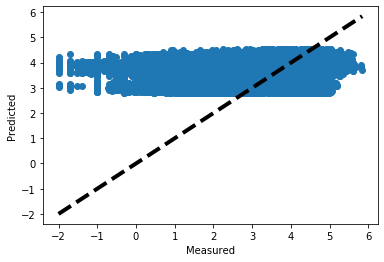

In [37]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

0.11225668294136859
Mean Squared error of 0.7029808271769403


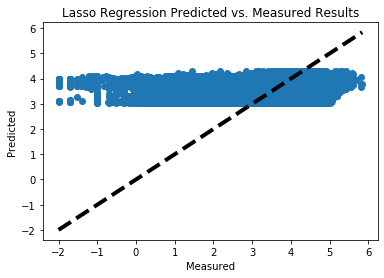

In [38]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
lasso = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
print(lasso.score(X,y))
y_pred = lasso.predict(X)
print(f'Mean Squared error of {mean_squared_error(y, y_pred)}')
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.title("Lasso Regression Predicted vs. Measured Results")
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## More Features

In [3]:
features = pd.read_csv('Features data set.csv', index_col=[0,1])
sales = pd.read_csv('sales data-set.csv')
stores = pd.read_csv('stores data-set.csv', index_col=0)
sales_and_features = sales.join(features, lsuffix='_sales', rsuffix='_feature', on=['Store', 'Date'])
sales_and_features = sales_and_features[sales_and_features['Weekly_Sales'] > 0]
log_sales = np.log10(sales_and_features[sales_and_features.Weekly_Sales!=0].Weekly_Sales)
sales_and_features['log_sales'] = log_sales
sales_and_features.MarkDown1.fillna(0, inplace=True)
sales_and_features.MarkDown2.fillna(0, inplace=True)
sales_and_features.MarkDown3.fillna(0, inplace=True)
sales_and_features.MarkDown4.fillna(0, inplace=True)
sales_and_features.MarkDown5.fillna(0, inplace=True)
sales_features_and_stores = sales_and_features.join(stores, on='Store', rsuffix='_store')
sales_features_and_stores.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_feature,log_sales,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4.396626,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,4.663131,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,4.619047,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,4.287881,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,4.339012,A,151315


In [4]:
sales_features_and_stores = pd.concat([sales_features_and_stores, pd.get_dummies(sales_features_and_stores['Type'])], axis=1)
sales_features_and_stores = pd.concat([sales_features_and_stores, pd.get_dummies(sales_features_and_stores['Store'], prefix='store')], axis=1)
sales_features_and_stores = pd.concat([sales_features_and_stores, pd.get_dummies(sales_features_and_stores['Dept'], prefix='dept')], axis=1)

In [5]:
sales_features_and_stores

,Store,Dept,Date,Weekly_Sales,IsHoliday_sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,dept_90,dept_91,dept_92,dept_93,dept_94,dept_95,dept_96,dept_97,dept_98,dept_99
0,1,1,05/02/2010,24924.50,False,42.31,2.572,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
1,1,1,12/02/2010,46039.49,True,38.51,2.548,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,1,1,19/02/2010,41595.55,False,39.93,2.514,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,1,1,26/02/2010,19403.54,False,46.63,2.561,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
4,1,1,05/03/2010,21827.90,False,46.50,2.625,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,64.88,3.997,4556.61,20.64,1.50,...,0,0,0,0,0,0,0,0,1,0
421566,45,98,05/10/2012,628.10,False,64.89,3.985,5046.74,0.00,18.82,...,0,0,0,0,0,0,0,0,1,0
421567,45,98,12/10/2012,1061.02,False,54.47,4.000,1956.28,0.00,7.89,...,0,0,0,0,0,0,0,0,1,0
421568,45,98,19/10/2012,760.01,False,56.47,3.969,2004.02,0.00,3.18,...,0,0,0,0,0,0,0,0,1,0


In [6]:
y = sales_features_and_stores.log_sales
sales_features_and_stores.drop(['Date','Store','Dept','Weekly_Sales','IsHoliday_feature','log_sales','Type'], inplace=True, axis=1)

In [7]:
X = sales_features_and_stores

In [10]:
X = sm.add_constant(X)
model = sm.OLS(y, X.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_sales   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     6645.
Date:                Wed, 18 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:23:49   Log-Likelihood:            -3.0817e+05
No. Observations:              420212   AIC:                         6.166e+05
Df Residuals:                  420077   BIC:                         6.181e+05
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.8072      0.053     34.278      0.000       1.704       1.911
IsHoliday_sales     0.0108      0.003      3.285      0.001       0.004       0.017
Temperature        -0.0006   5.24e-05    -11.294      0.000      -0.001      -0.000
Fuel_Price         -0.0228      0.003     -8.009      0.000      -0.028      -0.017
MarkDown1        3.467e-07    2.7e-07      1.282      0.200   -1.83e-07    8.77e-07
MarkDown2       -8.046e-07   1.64e-07     -4.901      0.000   -1.13e-06   -4.83e-07
MarkDown3        1.902e-06   1.47e-07     12.920      0.000    1.61e-06    2.19e-06
MarkDown4       -8.017e-07   3.78e-07     -2.122      0.034   -1.54e-06   -6.13e-08
MarkDown5        1.398e-06   2.25e-07      6.212      0.000    9.57e-07    1.84e-06
CPI                -0.0010      0.000     -2.347      0.019      -0.002      -0.000
Unemployment        0.0059      0.002      3.458      0.001       0.003       0.009
Size             8.948e-06   4.58e-08    195.518      0.000    8.86e-06    9.04e-06
A                   0.3847      0.017     22.853      0.000       0.352       0.418
B                   0.8323      0.017     49.332      0.000       0.799       0.865
C                   0.5903      0.019     30.484      0.000       0.552       0.628
store_1             0.4228      0.021     20.195      0.000       0.382       0.464
store_2             0.0891      0.019      4.710      0.000       0.052       0.126
store_3             0.3550      0.027     13.335      0.000       0.303       0.407
store_4             0.0010      0.022      0.043      0.965      -0.043       0.045
store_5             0.3327      0.025     13.298      0.000       0.284       0.382
store_6             0.0468      0.019      2.411      0.016       0.009       0.085
store_7             0.1783      0.015     11.816      0.000       0.149       0.208
store_8             0.2029      0.022      9.375      0.000       0.160       0.245
store_9            -0.2366      0.023    -10.184      0.000      -0.282      -0.191
store_10            0.1920      0.018     10.388      0.000       0.156       0.228
store_11           -0.0584      0.020     -2.886      0.004      -0.098      -0.019
store_12            0.0029      0.018      0.164      0.869      -0.032       0.038
store_13           -0.1347      0.022     -6.054      0.000      -0.178      -0.091
store_14            0.0700      0.007      9.459      0.000       0.056       0.085
store_15           -0.2509      0.016    -16.019      0.000      -0.282      -0.220
store_16            0.2892      0.015     19.903      0.000       0.261       0.318
store_17            0.1500      0.018      8.473      0.000       0.115       0.185
store_18            0.0162      0.015      1.075      0.282      -0.013       0.046
store_19           -0.1221      0.019     -6.508      0.000

By adding stores and departments as categorical dummie features, our R-squared value has increased dramatically, up to 0.679!

In [45]:
from sklearn.ensemble import RandomForestRegressor as rfr
estimators = [10, 20, 40, 80]
mean_rfrs = []
std_rfrs_upper = []
std_rfrs_lower = []

# for each number of estimators, fit the model and find the results for 8-fold cross validation
for i in estimators:
    model = rfr(n_estimators=i,max_depth=None, n_jobs=-1)
    scores_rfr = cross_val_score(model,X,y,cv=10,scoring='explained_variance')
    print('estimators:',i)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print("")
    mean_rfrs.append(scores_rfr.mean())
    std_rfrs_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    std_rfrs_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting

estimators: 10
Est. explained variance: 0.76 (+/- 0.24)

estimators: 20
Est. explained variance: 0.75 (+/- 0.28)

estimators: 40
Est. explained variance: 0.77 (+/- 0.22)

estimators: 80
Est. explained variance: 0.76 (+/- 0.25)



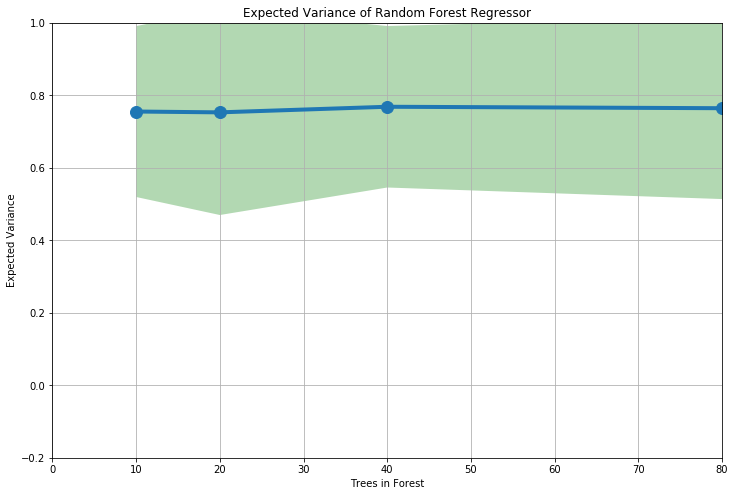

In [46]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(estimators,mean_rfrs,marker='o',
       linewidth=4,markersize=12)
ax.fill_between(estimators,std_rfrs_lower,std_rfrs_upper,
                facecolor='green',alpha=0.3,interpolate=True)
ax.set_ylim([-.2,1])
ax.set_xlim([0,80])
plt.title('Expected Variance of Random Forest Regressor')
plt.ylabel('Expected Variance')
plt.xlabel('Trees in Forest')
plt.grid()
plt.show()

In [14]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth':5, 'alpha': 10, 'n_jobs':-1, 'tree_method': 'gpu_hist'}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [15]:
cv_results.iloc[-1]

train-rmse-mean    0.504154
train-rmse-std     0.003435
test-rmse-mean     0.505203
test-rmse-std      0.002781
Name: 99, dtype: float64

In [17]:
min_rmse = float("Inf")
best_params = None

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(9,12)
]

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    cv_results = xgb.cv(
        params,
        data_dmatrix,
        num_boost_round=100,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(rmse, boost_rounds+1))
    if rmse < min_rmse:
        min_rmse = rmse
        best_params = (max_depth,min_child_weight)
        
print(best_params)

CV with max_depth=9, min_child_weight=9
	RMSE 0.40011080000000004 for 99 rounds
CV with max_depth=9, min_child_weight=10
	RMSE 0.4005396 for 99 rounds
CV with max_depth=9, min_child_weight=11
	RMSE 0.40034739999999996 for 99 rounds
CV with max_depth=10, min_child_weight=9
	RMSE 0.38290099999999994 for 99 rounds
CV with max_depth=10, min_child_weight=10
	RMSE 0.3828394 for 99 rounds
CV with max_depth=10, min_child_weight=11
	RMSE 0.3827828 for 99 rounds
CV with max_depth=11, min_child_weight=9
	RMSE 0.36425739999999995 for 99 rounds
CV with max_depth=11, min_child_weight=10
	RMSE 0.36425599999999997 for 99 rounds
CV with max_depth=11, min_child_weight=11
	RMSE 0.3633844 for 99 rounds
(11, 11)


In [55]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

In [56]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

min_rmse = float("Inf")
best_params = None

for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample_bytree={}".format(
                             subsample,
                             colsample))
    # Update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample

    cv_results = xgb.cv(
        params,
        data_dmatrix,
        num_boost_round=100,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10,
    )
    rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(rmse, boost_rounds))
    if rmse < min_rmse:
        min_rmse = rmse
        best_params = (subsample,colsample)
        
print(best_params)

CV with subsample=0.7, colsample_bytree=0.7
	RMSE 0.334309 for 99 rounds
CV with subsample=0.7, colsample_bytree=0.8
	RMSE 0.3321068 for 99 rounds
CV with subsample=0.7, colsample_bytree=0.9
	RMSE 0.3303994 for 99 rounds
CV with subsample=0.7, colsample_bytree=1.0
	RMSE 0.3242678 for 99 rounds
CV with subsample=0.8, colsample_bytree=0.7
	RMSE 0.3345694 for 99 rounds
CV with subsample=0.8, colsample_bytree=0.8
	RMSE 0.33140359999999996 for 99 rounds
CV with subsample=0.8, colsample_bytree=0.9
	RMSE 0.3263364 for 99 rounds
CV with subsample=0.8, colsample_bytree=1.0
	RMSE 0.3243716 for 99 rounds
CV with subsample=0.9, colsample_bytree=0.7
	RMSE 0.3332552 for 99 rounds
CV with subsample=0.9, colsample_bytree=0.8
	RMSE 0.3334916 for 99 rounds
CV with subsample=0.9, colsample_bytree=0.9
	RMSE 0.32746959999999997 for 99 rounds
CV with subsample=0.9, colsample_bytree=1.0
	RMSE 0.32201399999999997 for 99 rounds
CV with subsample=1.0, colsample_bytree=0.7
	RMSE 0.3300456 for 99 rounds
CV with s

In [57]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

In [58]:
min_rmse = float("Inf")
best_params = None

for learning_rate in [.3, .2, .1, .05, .01, .005]:
    print("CV with learning_rate={}".format(learning_rate))
    # Update our parameters
    params['learning_rate'] = learning_rate

    cv_results = xgb.cv(
        params,
        data_dmatrix,
        num_boost_round=100,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
        
    )
    rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(rmse, boost_rounds))
    if rmse < min_rmse:
        min_rmse = rmse
        best_params = (learning_rate)
        
print(best_params)

CV with learning_rate=0.3
	RMSE 0.222195 for 99 rounds
CV with learning_rate=0.2
	RMSE 0.24745840000000002 for 99 rounds
CV with learning_rate=0.1
	RMSE 0.32201399999999997 for 99 rounds
CV with learning_rate=0.05
	RMSE 0.42179420000000006 for 99 rounds
CV with learning_rate=0.01
	RMSE 1.3443994 for 99 rounds
CV with learning_rate=0.005
	RMSE 2.0768546 for 99 rounds
0.3


In [59]:
params['learning_rate'] = best_params

In [60]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=100,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.iloc[-1]

train-rmse-mean    0.209755
train-rmse-std     0.001894
test-rmse-mean     0.226677
test-rmse-std      0.003930
Name: 99, dtype: float64

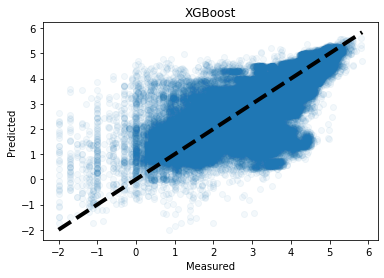

In [71]:
from sklearn.model_selection import cross_val_predict
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.3, gamma=0, subsample=0.9,
                           colsample_bytree=1, max_depth=25, min_child_weight=12, n_jobs=-1, verbose=1, objective="reg:squarederror")

xgb_reg.fit(X,y)
predicted = cross_val_predict(xgb_reg, X, y, cv=5)
fig, ax = plt.subplots()
ax.scatter(y, predicted, alpha = 0.05)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
plt.title('XGBoost')
ax.set_ylabel('Predicted')
plt.show()

In [72]:
y_mean = np.mean(y)
residuals = y-predicted

# Calculate total sum of squares
tss =  sum((y - y_mean)**2 )

# Calculate residual sum of squares
rss =  sum(residuals**2)

# Calculate R-squared
rsq  =  1 - (rss/tss)
print('The R-square of the test data is ', round(rsq,3))

The R-square of the test data is  0.721


0.6625809336371224
Mean Squared error of 0.2671933765302349


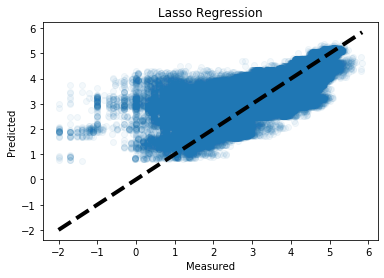

In [64]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
lasso = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X, y)
print(lasso.score(X,y))
y_pred = lasso.predict(X)
print(f'Mean Squared error of {mean_squared_error(y, y_pred)}')
fig, ax = plt.subplots()
plt.title('Lasso Regression')
ax.scatter(y, y_pred, alpha = 0.05)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()